## Gaussian Mixture Model Example

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300
n_components = 2
# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

## GMM using Scikit Learn

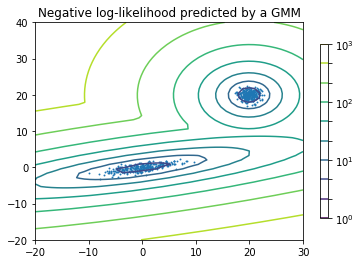

(50, 50)


In [160]:

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()
print(Z.shape)

## GMM using Expectation Maximization (EMM)
1. Initialize mean, covariance matrix, and weights
2. E-Step: Compute Responsibilities
![responsibilities](respon.png)
3. M-Step: Update mean, covariance matrix, and weights
![responsibilities](mean.png)
4. Go to step 2

In [159]:
from scipy.stats import multivariate_normal
mu_shape = (n_components,n_components)
mu = np.random.normal(size=mu_shape)
sigma = [np.identity(2) for _ in range(n_components)]
sigma_shape = np.array(sigma).shape
pi = np.ones((n_components,1))/n_components
r = np.zeros((n_components,n_samples))
g_values = np.zeros((n_components,n_samples))
n_loop = 100

for loop in range(n_loop):
    rv = [multivariate_normal(mu[i], sigma[i]) for i in range(n_components)]
    g_val = np.array([rv[i].pdf(X_train) for i in range(n_components)])
    g_val_sum = g_val.sum(axis=0)
    g_val_sum = np.reshape(g_val_sum, (-1, g_val_sum.shape[0]))
    g_val_sum = np.repeat(g_val_sum, n_components, axis=0)
    
    p = np.repeat(pi, X_train.shape[0], axis=1)
    
    
    r = np.multiply(p, g_val)
    r = np.divide(r, g_val_sum)
    
    N = r.sum(axis=1)
    #print(N.shape)
    N = np.repeat(N, n_components, axis=0)
    #print(N)
    r = np.repeat(r, n_components, axis=0)
    #print(r.shape)
    x_t = X_train.transpose()
    x_t = np.concatenate([x_t, x_t], axis=0)
    #print(x_t.shape)
    mu = np.multiply(r, x_t).sum(axis=1)
    mu = np.divide(mu, N)
    mu = np.reshape(mu, [-1, 1])
    
    #print(mu.shape)
    #print(mu)
    x_t = x_t - mu
    x_tt = x_t
    x_t = np.multiply(x_t, r)
    x_t = np.reshape(x_t, (n_components, n_components, -1))
    x_tt = np.reshape(x_tt, (n_components, n_components, -1))
    sigma = [np.matmul(x_t[i], x_tt[i].transpose()) for i in range(x_t.shape[0])]
    N = np.reshape(N, (-1,1))
    N = np.repeat(N, n_components, axis=1)
    N = np.reshape(N, (n_components, n_components, -1))

    sigma = [np.divide(sigma[i], N[i]) for i in range(n_components)]
    
    N = np.mean(N, axis=-1)
    N = np.mean(N, axis=-1)
    N = 2*np.reshape(N, pi.shape)/X_train.shape[0]

    pi = np.reshape(N, pi.shape)
    mu = np.reshape(mu, mu_shape)
    sigma = np.reshape(np.array(sigma), sigma_shape)
    if loop == n_loop - 1:
        print("mu:", mu)
        print('sigma:', sigma)
        print('pi', pi)
        

mu: [[19.91453549 19.97556345]
 [-0.13607006 -0.07059606]]
sigma: [[[1.02179864e+00 3.28158679e-03]
  [3.28158679e-03 9.90374215e-01]]

 [[1.13328030e+01 2.25048269e+00]
  [2.25048269e+00 8.77008968e-01]]]
pi [[0.80011559]
 [0.23802793]]
